In [1]:
import random
import numpy as np
import pandas as pd
from scipy.stats import bootstrap, permutation_test
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import itertools
import collections
sns.set()

In [2]:
df = pd.read_csv('movieReplicationSet.csv')
df = df.apply(pd.to_numeric, errors = 'coerce')
df.head(5)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [3]:
N_movies = 400
N_users = 1097 
movies = list(df)[0:400] # get the list of movie name
movies[0:3]

['The Life of David Gale (2003)',
 'Wing Commander (1999)',
 'Django Unchained (2012)']

## question1: popular vs unpopular

In [7]:
#find the median of rating number
valid_rating_summary = [] # record num of valid rating for each movie
for i in range(0, N_movies):
    current_valid_rating = np.sum(np.isfinite(df.iloc[:,i].values)*1)
    valid_rating_summary.append(current_valid_rating)
valid_rating_summary = np.array(valid_rating_summary)
median_of_valid = np.median(valid_rating_summary) 
median_of_valid 
#get the median number of valid rating. If rating num > 197.5, we say it is a popular movie. O.W. it is unpolular movie.

197.5

### Method1: T Test on Mean

In [8]:
#Using mean to represent the rating of each movie
#And apply indepdendent t test on popular and unpopular movies
popular_movie_rating_mean = []
unpopular_movie_rating_mean = []
for col in movies:
    current_movie = df[col]
    current_num_valid_rating = np.sum(np.isfinite(df[col].values)*1)
    current_movie_valid = current_movie[np.isfinite(current_movie)] #maintain valid rating
    cur_mean = np.mean(current_movie_valid)

    if current_num_valid_rating < median_of_valid:
        unpopular_movie_rating_mean.append(cur_mean)
    else:
        popular_movie_rating_mean.append(cur_mean)

t1, p1 = stats.ttest_ind(popular_movie_rating_mean,unpopular_movie_rating_mean, alternative='greater')
t1, p1

(17.7560492698737, 1.1348265138282423e-52)

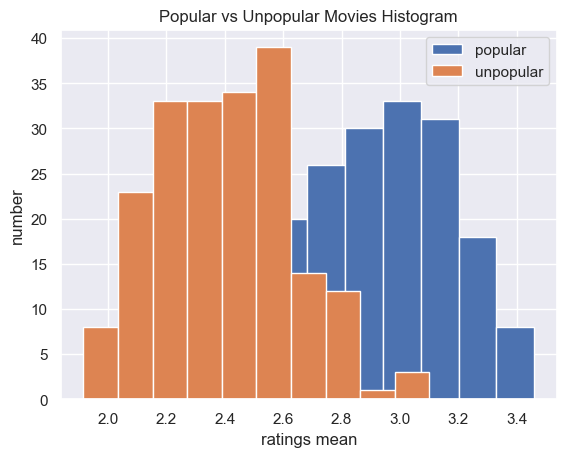

In [9]:
#plot to make result more clear
plt.hist(popular_movie_rating_mean, label = 'popular')
plt.hist(unpopular_movie_rating_mean, label = 'unpopular')
plt.xlabel("ratings mean")
plt.ylabel("number")
plt.title('Popular vs Unpopular Movies Histogram')
plt.legend()
plt.show()

### Method 2: Chi Sqaure Test on All Data

In [10]:
popular_movie_rating = [] #store all the ratings of popular movies
unpopular_movie_rating = [] #store all the ratings of unpopular movies

for col in movies:
    current_movie = df[col]
    current_num_valid_rating = np.sum(np.isfinite(df[col].values)*1)
    current_movie_valid = current_movie[np.isfinite(current_movie)] #maintain valid rating
    cur_mean = np.mean(current_movie_valid)
    if current_num_valid_rating < median_of_valid:
        unpopular_movie_rating += list(current_movie_valid)
    else:
        popular_movie_rating += list(current_movie_valid)

len(popular_movie_rating), len(unpopular_movie_rating)

(90214, 22000)

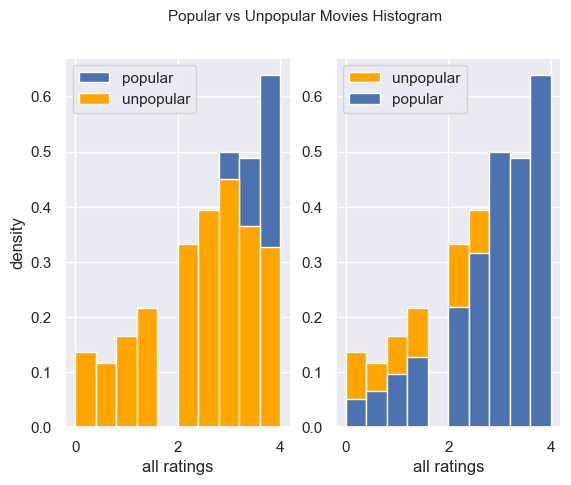

In [59]:
#plot to make result more clear
fig, ax = plt.subplots(1, 2)
fig.suptitle("Popular vs Unpopular Movies Histogram", fontsize=11)
ax[0].hist(popular_movie_rating, label = 'popular', density = True)
ax[0].hist(unpopular_movie_rating, label = 'unpopular', color = 'orange', density = True)
ax[0].set_xlabel("all ratings")
ax[0].set_ylabel('density')
ax[0].legend()

ax[1].hist(unpopular_movie_rating, label = 'unpopular', color = 'orange', density = True)
ax[1].hist(popular_movie_rating, label = 'popular', density = True)
ax[1].set_xlabel("all ratings")
ax[1].legend()
plt.show()

In [12]:
def get_proportion_of_rating(rating_list):
    N = len(rating_list)
    dic = {}
    counter = collections.Counter(rating_list)
    for element in counter:
        dic[element] = counter[element]/N
    order_dic = collections.OrderedDict(sorted(dic.items()))
    return order_dic 

In [13]:
def get_num_of_rating(rating_list):
    dic = {}
    counter = collections.Counter(rating_list)
    for element in counter:
        dic[element] = counter[element]
    order_dic = collections.OrderedDict(sorted(dic.items()))
    return order_dic 

In [22]:
num_of_each_rating_popular = list(get_num_of_rating(popular_movie_rating).values())
num_of_each_rating_unpopular = list(get_num_of_rating(unpopular_movie_rating).values())
num_of_each_rating_popular, num_of_each_rating_unpopular

([1830, 2362, 3459, 4591, 7872, 11386, 18032, 17642, 23040],
 [1199, 1024, 1448, 1897, 2930, 3461, 3965, 3207, 2869])

In [41]:
#make ​sum of the observed frequencies agree with the sum of the expected frequencies
N_popular_rating = sum(num_of_each_rating_popular)
N_unpopular_rating = sum(num_of_each_rating_unpopular)
num_of_each_rating_popular_modified =  [i * N_unpopular_rating/N_popular_rating for i in num_of_each_rating_popular]
num_of_each_rating_popular_modified, num_of_each_rating_unpopular

([446.2721972199437,
  576.0081583789656,
  843.527612122287,
  1119.5823264681758,
  1919.7020418116922,
  2776.642206309442,
  4397.366262442636,
  4302.259072871173,
  5618.640122375685],
 [1199, 1024, 1448, 1897, 2930, 3461, 3965, 3207, 2869])

In [10]:
np.round([446.2721972199437,
  576.0081583789656,
  843.527612122287,
  1119.5823264681758,
  1919.7020418116922,
  2776.642206309442,
  4397.366262442636,
  4302.259072871173], 2)

array([ 446.27,  576.01,  843.53, 1119.58, 1919.7 , 2776.64, 4397.37,
       4302.26])

In [57]:
chi12, p12 = stats.chisquare(f_obs = num_of_each_rating_unpopular, f_exp = num_of_each_rating_popular_modified)
chi12, p12

(4958.369565292014, 0.0)

### Method3: U test on median

In [43]:
#Now try to implement Mann Whitney U test
popular_movie_rating_median = []
unpopular_movie_rating_median = []
for col in movies:
    current_movie = df[col]
    current_num_valid_rating = np.sum(np.isfinite(df[col].values)*1)
    current_movie_valid = current_movie[np.isfinite(current_movie)] #maintain valid rating
    cur_median = np.median(current_movie_valid)

    if current_num_valid_rating < median_of_valid:
        unpopular_movie_rating_median.append(cur_median)
    else:
        popular_movie_rating_median.append(cur_median)
len(popular_movie_rating_median), len(unpopular_movie_rating_median)

(200, 200)

In [44]:
u1, p13 = stats.mannwhitneyu(popular_movie_rating_median, unpopular_movie_rating_median, alternative='greater')
u1, p13

(33427.5, 9.929258851707232e-35)

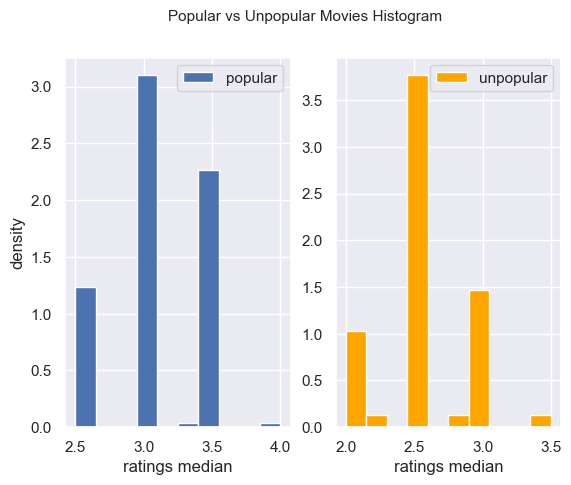

In [123]:
#plot them to make result more clear
fig, ax = plt.subplots(1, 2)
fig.suptitle("Popular vs Unpopular Movies Histogram", fontsize=11)
ax[0].hist(popular_movie_rating_median, label = 'popular', density = True)
ax[1].hist(unpopular_movie_rating_median, label = 'unpopular', color = 'orange', density = True)
ax[0].set_xlabel("ratings median")
ax[1].set_xlabel("ratings median")
ax[0].set_ylabel('density')
ax[0].legend()
ax[1].legend()
plt.show()

## question 2: old vs new

In [4]:
movie_years = np.array([int(movie[-5:-1]) for movie in movies]) #get the list of movie years

In [5]:
median_of_year = np.median(movie_years) 
median_of_year

1999.0

### Method1: T Test on Mean

In [6]:
New_movie_rating_mean = []
Old_movie_rating_mean = []
for movie in movies:
    current_movie = df[movie]
    current_movie_year = int(movie[-5:-1])
    current_movie_valid = current_movie[np.isfinite(current_movie)] # mean of valid rating
    cur_mean = np.mean(current_movie_valid)

    if current_movie_year < median_of_year:
        Old_movie_rating_mean.append(cur_mean)
    else:
        New_movie_rating_mean.append(cur_mean)
len(New_movie_rating_mean), len(Old_movie_rating_mean)

(203, 197)

In [7]:
t2 ,p2 = stats.ttest_ind(New_movie_rating_mean,Old_movie_rating_mean)
t2, p2

(1.605479609469478, 0.10918141397982746)

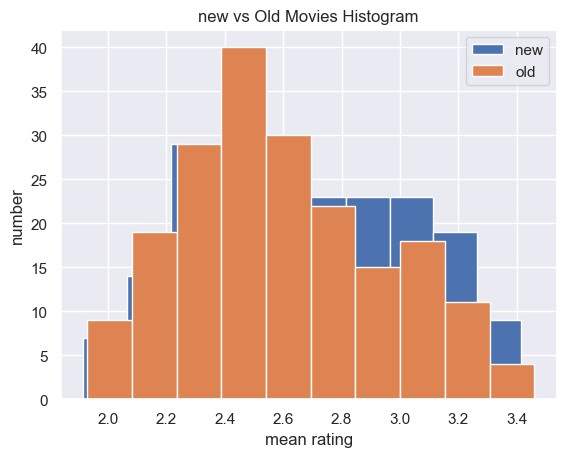

In [8]:
#plot them to make result more clear
plt.hist(New_movie_rating_mean, label = 'new')
plt.hist(Old_movie_rating_mean, label = 'old')
plt.xlabel("mean rating")
plt.ylabel("number")
plt.title('new vs Old Movies Histogram')
plt.legend()
plt.show()

### Method2: U test on median

Now we perform u test on each of movie's median rating

In [77]:
new_movie_rating_median = []
old_movie_rating_median = []
for movie in movies:
    current_movie = df[movie]
    current_movie_year = int(movie[-5:-1])
    current_movie_valid = current_movie[np.isfinite(current_movie)] #maintain valid rating
    cur_median = np.median(current_movie_valid)

    if current_movie_year < median_of_year:
        old_movie_rating_median.append(cur_median)
    else:
        new_movie_rating_median.append(cur_median)
len(old_movie_rating_median), len(new_movie_rating_median)

(197, 203)

In [78]:
u2, p22 = stats.mannwhitneyu(old_movie_rating_median, new_movie_rating_median)
u2, p22

(18127.5, 0.08873661144000093)

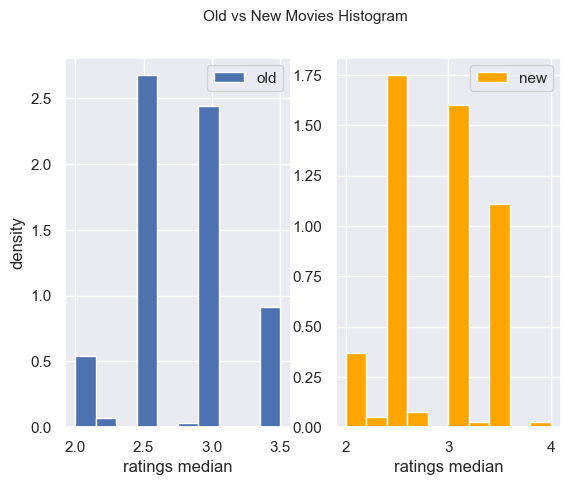

In [79]:
#plot them to make result more clear
fig, ax = plt.subplots(1, 2)
fig.suptitle("Old vs New Movies Histogram", fontsize=11)
ax[0].hist(old_movie_rating_median, label = 'old', density = True)
ax[1].hist(new_movie_rating_median, label = 'new', color = 'orange', density = True)
ax[0].set_xlabel("ratings median")
ax[1].set_xlabel("ratings median")
ax[0].set_ylabel('density')
ax[0].legend()
ax[1].legend()
plt.show()

### Method 3: U test on all the ratings

In [81]:
new_movie_rating = [] #store all the ratings of new movies
old_movie_rating = [] #store all the ratings of old movies

for col in movies:
    current_movie = df[col]
    current_movie_valid = current_movie[np.isfinite(current_movie)] #maintain valid rating
    current_movie_year = int(col[-5:-1])
    
    if current_movie_year < median_of_year:
        old_movie_rating += list(current_movie_valid)
    else:
        new_movie_rating += list(current_movie_valid)

len(new_movie_rating), len(old_movie_rating)

(65690, 46524)

In [86]:
np.median(new_movie_rating), np.median(old_movie_rating)

(3.0, 3.0)

In [87]:
u, p  = stats.mannwhitneyu(new_movie_rating,old_movie_rating)
u, p

(1553577699.0, 1.2849216001533932e-06)

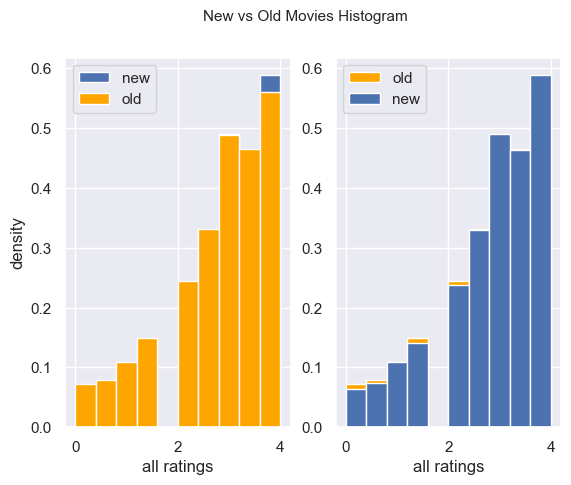

In [80]:
fig, ax = plt.subplots(1, 2)
fig.suptitle("New vs Old Movies Histogram", fontsize=11)
ax[0].hist(new_movie_rating, label = 'new', density = True)
ax[0].hist(old_movie_rating, label = 'old', color = 'orange', density = True)
ax[0].set_xlabel("all ratings")
ax[0].set_ylabel('density')
ax[0].legend()

ax[1].hist(old_movie_rating, label = 'old', color = 'orange', density = True)
ax[1].hist(new_movie_rating, label = 'new', density = True)
ax[1].set_xlabel("all ratings")
ax[1].legend()
plt.show()

## question 3: Shrek (2001) gender comparison

In [27]:
df_shrek = df[['Shrek (2001)', 'Gender identity (1 = female; 2 = male; 3 = self-described)']]
df_shrek

,Shrek (2001),Gender identity (1 = female; 2 = male; 3 = self-described)
0,3.0,1.0
1,3.0,1.0
2,3.5,1.0
3,0.5,1.0
4,3.0,1.0
...,...,...
1092,3.0,1.0
1093,4.0,1.0
1094,3.5,1.0
1095,2.5,1.0


In [28]:
male_rating_shrek = []
female_rating_shrek = []
c = 0
for index, series in df_shrek.iterrows():
    if np.isfinite(series['Shrek (2001)']):
        if series['Gender identity (1 = female; 2 = male; 3 = self-described)']== 1.0:
            female_rating_shrek.append(series['Shrek (2001)'])
        elif series['Gender identity (1 = female; 2 = male; 3 = self-described)']== 2.0:
            male_rating_shrek.append(series['Shrek (2001)'])
        else:
            c+=1
len(female_rating_shrek), len(male_rating_shrek)

(743, 241)

In [29]:
u3 ,p3 = stats.mannwhitneyu(male_rating_shrek,female_rating_shrek)
u3, p3

(82232.5, 0.050536625925559006)

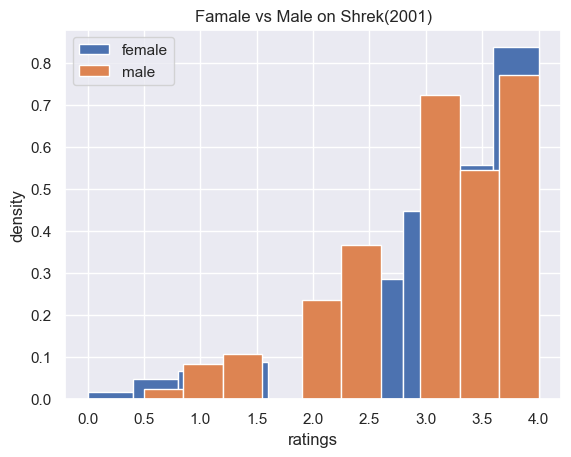

In [83]:
plt.hist(female_rating_shrek, label = 'female', density = True)
plt.hist(male_rating_shrek, label = 'male', density = True)
plt.xlabel("ratings")
plt.ylabel("density")
plt.title('Famale vs Male on Shrek(2001)')
plt.legend()
plt.show()

## question 4: What proportion of movies are rated differently by male and female viewers?


In [32]:
movies = list(df)[0:400] # get the list of movie names
gender_identity_list = list(df['Gender identity (1 = female; 2 = male; 3 = self-described)'])

In [34]:
t_test_N_similar_rating = 0
t_test_N_dif_rating = 0
u_test_N_similar_rating = 0
u_test_N_dif_rating = 0

for i in range(N_movies):
    current_movie = df[movies[i]]
    male_rating_cur = []
    female_rating_cur = []
    for user_i, rating in current_movie.iteritems():
        if np.isfinite(rating):
            if gender_identity_list[user_i] == 1:
                female_rating_cur.append(rating)
            elif gender_identity_list[user_i] == 2:
                male_rating_cur.append(rating)
    t_test_t_cur ,t_test_p_cur = stats.ttest_ind(male_rating_cur,female_rating_cur)
    u_test_t_cur ,u_test_p_cur = stats.mannwhitneyu(male_rating_cur,female_rating_cur)

    if t_test_p_cur < 0.005:
        t_test_N_dif_rating += 1
    elif t_test_p_cur >= 0.005:
        t_test_N_similar_rating += 1
    
    if u_test_p_cur < 0.005:
        u_test_N_dif_rating += 1
    elif u_test_p_cur >= 0.005:
        u_test_N_similar_rating += 1

print('t test-----------')
print(t_test_N_dif_rating, t_test_N_similar_rating)
print(t_test_N_dif_rating/(t_test_N_dif_rating + t_test_N_similar_rating))

print('u test-----------')
print(u_test_N_dif_rating, u_test_N_similar_rating)
print(u_test_N_dif_rating/(u_test_N_dif_rating + u_test_N_similar_rating))

t test-----------
46 354
0.115
u test-----------
50 350
0.125


## question 5: lion king only children vs with siblings

In [37]:
only_child_list = list(df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'])

In [51]:
only_child_rating_lion = [] 
with_sibilings_rating_lion = []

for user_i, rating in df['The Lion King (1994)'].iteritems():
    if np.isfinite(rating):
        if only_child_list[user_i] == 1:
            only_child_rating_lion.append(rating)
        elif only_child_list[user_i] == 0:
            with_sibilings_rating_lion.append(rating)

len(only_child_rating_lion), len(with_sibilings_rating_lion)

(151, 776)

In [52]:
u5 ,p5 = stats.mannwhitneyu(only_child_rating_lion,with_sibilings_rating_lion)
u5, p5

(52929.0, 0.04319872995682849)

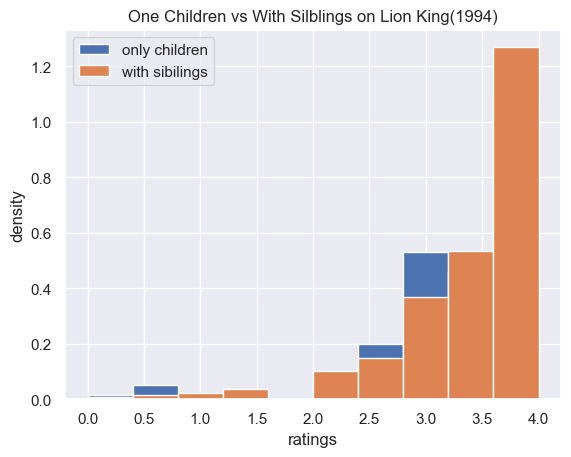

In [84]:
plt.hist(only_child_rating_lion, label = 'only children', density = True)
plt.hist(with_sibilings_rating_lion, label = 'with sibilings', density = True)
plt.xlabel("ratings")
plt.ylabel("density")
plt.title('One Children vs With Silblings on Lion King(1994)')
plt.legend()
plt.show()

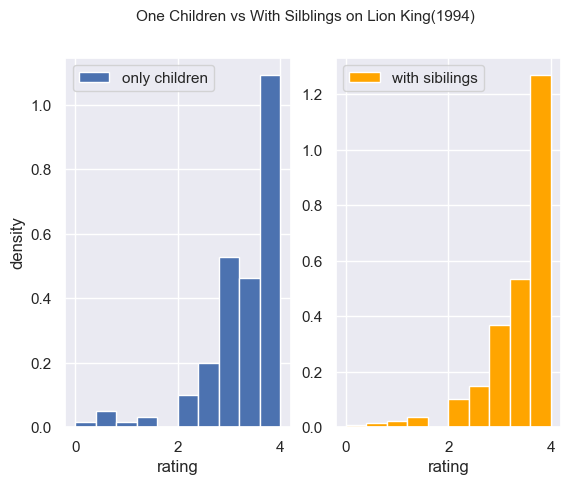

In [89]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('One Children vs With Silblings on Lion King(1994)', fontsize=11)

ax[0].hist(only_child_rating_lion, label = 'only children', density = True)
ax[0].set_xlabel("rating")
ax[0].legend()
ax[0].set_ylabel('density')


ax[1].hist(with_sibilings_rating_lion, label = 'with sibilings', color = 'orange', density = True)
ax[1].set_xlabel("rating")
ax[1].legend()
plt.show()

## question 6: proportion of only child effect

In [ ]:
only_child_list = list(df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'])

In [91]:
N_similar_rating_6 = 0
N_dif_rating_6 = 0
u_value_record = []
p_value_record = []

for i in range(N_movies):
    current_movie = df[movies[i]]
    without_sibling_rating_cur = []
    with_sibling_rating_cur = []
    
    for user_i, rating in current_movie.iteritems():
        if np.isfinite(rating):
            if only_child_list[user_i] == 1:
                without_sibling_rating_cur.append(rating)
            elif only_child_list[user_i] == 0:
                with_sibling_rating_cur.append(rating)

    u6_cur, p6_cur = stats.mannwhitneyu(without_sibling_rating_cur,with_sibling_rating_cur)
    u_value_record.append(u6_cur)
    p_value_record.append(p6_cur)

    if p6_cur < 0.005:  
        N_dif_rating_6 += 1
    elif p6_cur >= 0.005:
        N_similar_rating_6 += 1

print(N_dif_rating_6, N_similar_rating_6)
print(N_dif_rating_6/(N_dif_rating_6 + N_similar_rating_6))

7 393
0.0175


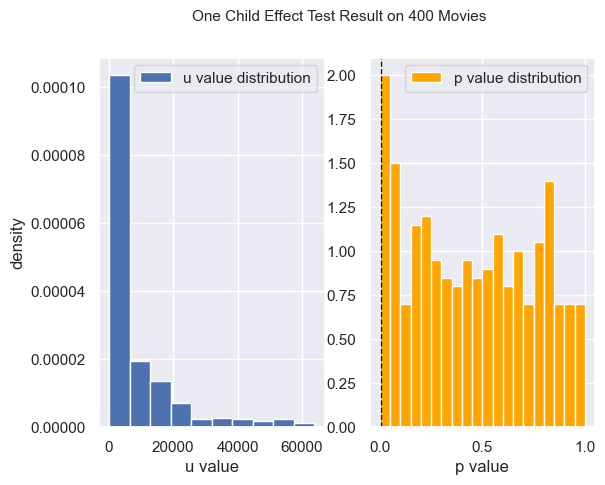

In [99]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('One Child Effect Test Result on 400 Movies', fontsize=11)

ax[0].hist(u_value_record, label = 'u value distribution', density = True)
ax[0].set_xlabel("u value")
ax[0].legend()
ax[0].set_ylabel('density')


ax[1].hist(p_value_record, bins = 20, label = 'p value distribution', color = 'orange', density = True)
ax[1].set_xlabel("p value")
plt.axvline(0.005, color='k', linestyle='dashed', linewidth=1)
ax[1].legend()
plt.show()

## question 7: Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

In [100]:
whether_alone_list = list(df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'])

In [104]:
alone_rating_wolf = []
socially_rating_wolf = []

for user_i, rating in df['The Wolf of Wall Street (2013)'].iteritems():
    if np.isfinite(rating):
        if whether_alone_list[user_i] == 1:
            alone_rating_wolf.append(rating)
        elif whether_alone_list[user_i] == 0:
            socially_rating_wolf.append(rating)

len(alone_rating_wolf), len(socially_rating_wolf)

(393, 270)

In [102]:
u7 ,p7 = stats.mannwhitneyu(alone_rating_wolf,socially_rating_wolf)
u7, p7

(56806.5, 0.1127642933222891)

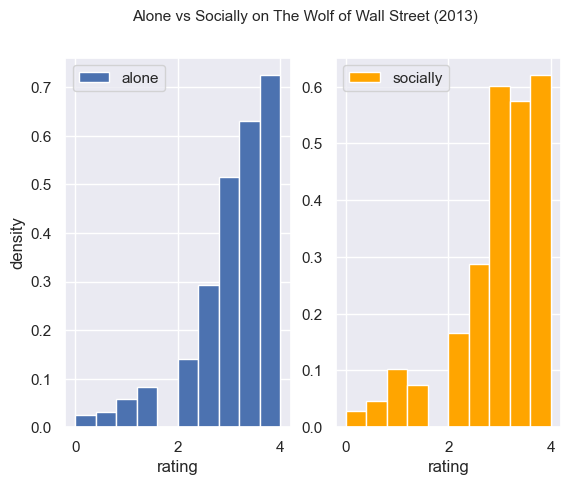

In [105]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('Alone vs Socially on The Wolf of Wall Street (2013)', fontsize=11)

ax[0].hist(alone_rating_wolf, label = 'alone', density = True)
ax[0].set_xlabel("rating")
ax[0].legend()
ax[0].set_ylabel('density')


ax[1].hist(socially_rating_wolf, label = 'socially', color = 'orange', density = True)
ax[1].set_xlabel("rating")
ax[1].legend()
plt.show()

## question 8 : proportion of social watching effect

In [110]:
N_similar_rating_8 = 0
N_dif_rating_8 = 0
u_value_record = []
p_value_record = []

for i in range(N_movies):
    current_movie = df[movies[i]]
    alone_rating_cur = []
    socially_rating_cur = []
    
    for user_i, rating in current_movie.iteritems():
        if np.isfinite(rating):
            if whether_alone_list[user_i] == 1:
                alone_rating_cur.append(rating)
            elif whether_alone_list[user_i] == 0:
                socially_rating_cur.append(rating)

    u8_cur, p8_cur = stats.mannwhitneyu(alone_rating_cur,socially_rating_cur)
    u_value_record.append(u8_cur)
    p_value_record.append(p8_cur)

    if p8_cur < 0.005:  
        N_dif_rating_8 += 1
    elif p8_cur >= 0.005:
        N_similar_rating_8 += 1

print(N_dif_rating_8, N_similar_rating_8)
print(N_dif_rating_8/(N_dif_rating_8 + N_similar_rating_8))

10 390
0.025


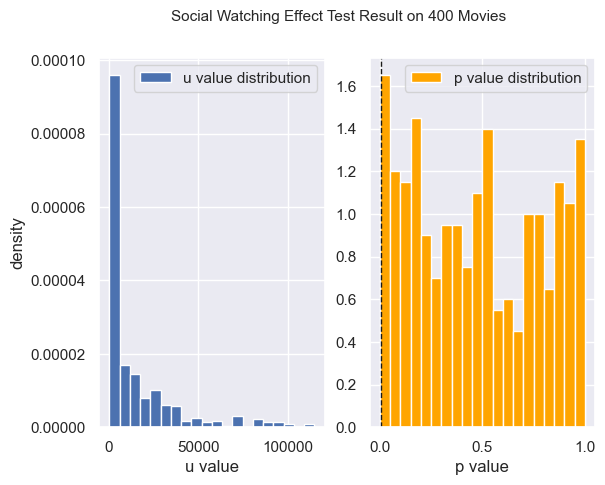

In [109]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('Social Watching Effect Test Result on 400 Movies', fontsize=11)

ax[0].hist(u_value_record, bins = 20, label = 'u value distribution', density = True)
ax[0].set_xlabel("u value")
ax[0].legend()
ax[0].set_ylabel('density')


ax[1].hist(p_value_record, bins = 20, label = 'p value distribution', color = 'orange', density = True)
ax[1].set_xlabel("p value")
plt.axvline(0.005, color='k', linestyle='dashed', linewidth=1)
ax[1].legend()
plt.show()

## question 9: compare distribution between Home Alone (1990)’ and ‘Finding Nemo (2003)’

In [96]:
home_alone = pd.to_numeric(df['Home Alone (1990)'],errors='coerce').values
finding_nemo = pd.to_numeric(df['Finding Nemo (2003)'],errors='coerce').values

temp = np.array([pd.isnull(home_alone),pd.isnull(finding_nemo)],dtype=bool)
temp2 = temp*1
temp2 = sum(temp2)
missingData = np.where(temp2>0)

home_alone = np.delete(home_alone,missingData)
finding_nemo = np.delete(finding_nemo,missingData)

home_alone.shape, finding_nemo.shape

((810,), (810,))

In [98]:
category_data_home_alone = list(get_num_of_rating(home_alone).values())
category_data_finding_nemo = list(get_num_of_rating(finding_nemo).values())
category_data_home_alone, category_data_finding_nemo

([9, 11, 22, 28, 54, 90, 170, 167, 259], [5, 9, 13, 15, 24, 60, 122, 194, 368])

In [102]:
chi, p9 = stats.chisquare(category_data_home_alone, category_data_finding_nemo)
chi, p9

(128.5701842892391, 5.596786317058825e-24)

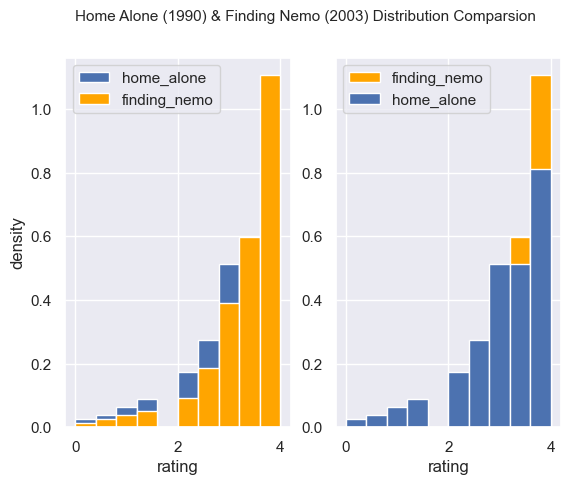

In [122]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('Home Alone (1990) & Finding Nemo (2003) Distribution Comparsion', fontsize=11)

ax[0].hist(home_alone, label = 'home_alone', density = True)
ax[0].hist(finding_nemo, label = 'finding_nemo', color = 'orange', density = True)
ax[0].set_xlabel("rating")
ax[0].legend()
ax[0].set_ylabel('density')


ax[1].hist(finding_nemo, label = 'finding_nemo', color = 'orange', density = True)
ax[1].hist(home_alone, label = 'home_alone', density = True)
ax[1].set_xlabel("rating")
ax[1].legend()
plt.show()

## question 10: franchises comparsion (Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’)

### Star Wars


In [130]:
s1 = pd.to_numeric(df['Star Wars: Episode IV - A New Hope (1977)'],errors='coerce').values
s2 = pd.to_numeric(df['Star Wars: Episode V - The Empire Strikes Back (1980)'],errors='coerce').values
s3 = pd.to_numeric(df['Star Wars: Episode VI - The Return of the Jedi (1983)'],errors='coerce').values
s4 = pd.to_numeric(df['Star Wars: Episode 1 - The Phantom Menace (1999)'],errors='coerce').values
s5 = pd.to_numeric(df['Star Wars: Episode II - Attack of the Clones (2002)'],errors='coerce').values
s6 = pd.to_numeric(df['Star Wars: Episode VII - The Force Awakens (2015)'],errors='coerce').values

In [134]:
temp = np.array([pd.isnull(s1),pd.isnull(s2),pd.isnull(s3),pd.isnull(s4),pd.isnull(s5),pd.isnull(s6)],dtype=bool)
temp2 = temp*1
temp2 = sum(temp2)
missingData = np.where(temp2>0)
s1 = np.delete(s1,missingData)
s2 = np.delete(s2,missingData)
s3 = np.delete(s3,missingData)
s4 = np.delete(s4,missingData)
s5 = np.delete(s5,missingData)
s6 = np.delete(s6,missingData)

s6.shape

(333,)

In [137]:
h10_1,p10_1 = stats.kruskal(s1, s2, s3, s4, s5, s6)
h10_1,p10_1

(193.51026675400544, 6.940162236984522e-40)

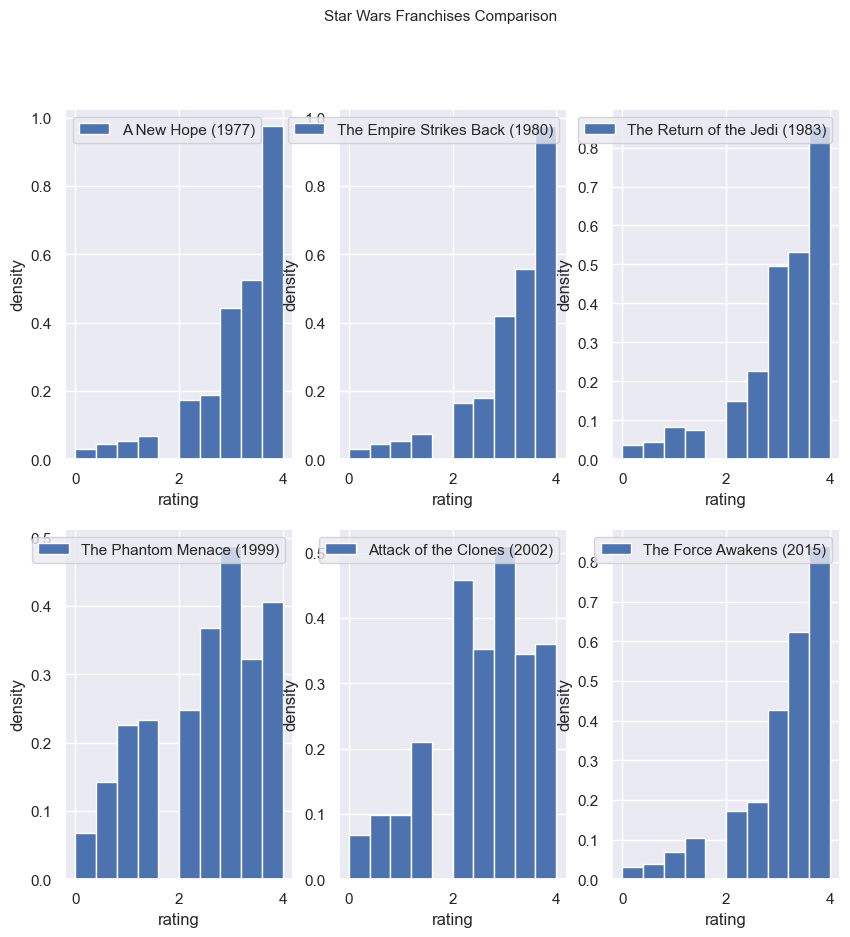

In [147]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(10, 10))
fig.suptitle('Star Wars Franchises Comparison', fontsize=11)

ax1.hist(s1, label = 'A New Hope (1977)', density = True)
ax1.set_xlabel("rating")
ax1.legend()
ax1.set_ylabel('density')

ax2.hist(s2, label = 'The Empire Strikes Back (1980)', density = True)
ax2.set_xlabel("rating")
ax2.legend()
ax2.set_ylabel('density')

ax3.hist(s3, label = 'The Return of the Jedi (1983)', density = True)
ax3.set_xlabel("rating")
ax3.legend()
ax3.set_ylabel('density')


ax4.hist(s4, label = 'The Phantom Menace (1999)', density = True)
ax4.set_xlabel("rating")
ax4.legend()
ax4.set_ylabel('density')

ax5.hist(s5, label = 'Attack of the Clones (2002)', density = True)
ax5.set_xlabel("rating")
ax5.legend()
ax5.set_ylabel('density')

ax6.hist(s6, label = 'The Force Awakens (2015)', density = True)
ax6.set_xlabel("rating")
ax6.legend()
ax6.set_ylabel('density')

plt.show()

### Harry Potter

In [165]:
h1 = pd.to_numeric(df['Harry Potter and the Sorcerer\'s Stone (2001)'],errors='coerce').values
h2 = pd.to_numeric(df['Harry Potter and the Chamber of Secrets (2002)'],errors='coerce').values
h3 = pd.to_numeric(df['Harry Potter and the Goblet of Fire (2005)'],errors='coerce').values
h4 = pd.to_numeric(df['Harry Potter and the Deathly Hallows: Part 2 (2011)'],errors='coerce').values

In [166]:
temp = np.array([pd.isnull(h1),pd.isnull(h2),pd.isnull(h3), pd.isnull(h4)],dtype=bool)
temp2 = temp*1
temp2 = sum(temp2)
missingData = np.where(temp2>0)
h1 = np.delete(h1,missingData)
h2 = np.delete(h2,missingData)
h3 = np.delete(h3,missingData)
h4 = np.delete(h4,missingData)

h1.shape

(710,)

In [171]:
np.mean(h1), np.mean(h2),np.mean(h3),np.mean(h4)

(3.4190140845070425, 3.3309859154929575, 3.359154929577465, 3.3732394366197185)

In [169]:
h10_2,p10_2 = stats.kruskal(h1, h2, h3, h4)
h10_2,p10_2

(5.8739552218536755, 0.11790622831256074)

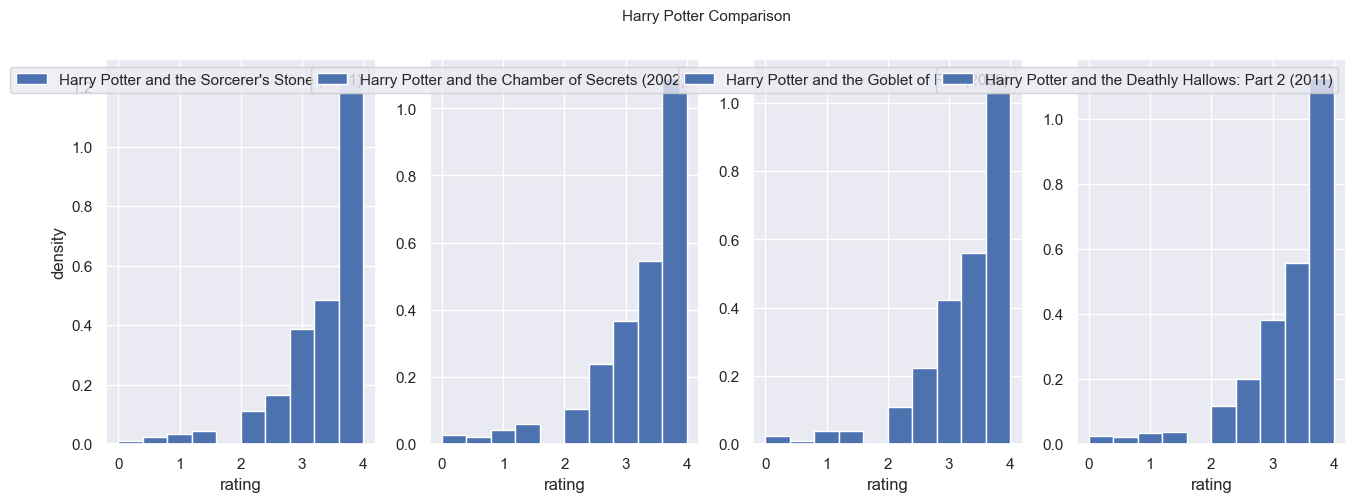

In [170]:
fig, ax = plt.subplots(1, 4, figsize=(16, 5))
fig.suptitle('Harry Potter Comparison', fontsize=11)
labels = ['Harry Potter and the Sorcerer\'s Stone (2001)', 'Harry Potter and the Chamber of Secrets (2002)', \
    'Harry Potter and the Goblet of Fire (2005)', 'Harry Potter and the Deathly Hallows: Part 2 (2011)']
h = [h1, h2, h3, h4]
for i in range(0, 4):
    ax[i].hist(h[i], label = labels[i], density = True)
    ax[i].set_xlabel("rating")
    ax[i].legend()
    if i ==0:
        ax[i].set_ylabel('density')

### The Matrix

In [148]:
m1 = pd.to_numeric(df['The Matrix (1999)'],errors='coerce').values
m2 = pd.to_numeric(df['The Matrix Reloaded (2003)'],errors='coerce').values
m3 = pd.to_numeric(df['The Matrix Revolutions (2003)'],errors='coerce').values

In [149]:
temp = np.array([pd.isnull(m1),pd.isnull(m2),pd.isnull(m3)],dtype=bool)
temp2 = temp*1
temp2 = sum(temp2)
missingData = np.where(temp2>0)
m1 = np.delete(m1,missingData)
m2 = np.delete(m2,missingData)
m3 = np.delete(m3,missingData)

m3.shape

(260,)

In [163]:
np.mean(m1), np.mean(m2),np.mean(m3)

(3.253846153846154, 2.8461538461538463, 2.8057692307692306)

In [167]:
h10_3,p10_3 = stats.kruskal(m1, m2, m3)
h10_3,p10_3

(40.32303905969196, 1.7537323830838066e-09)

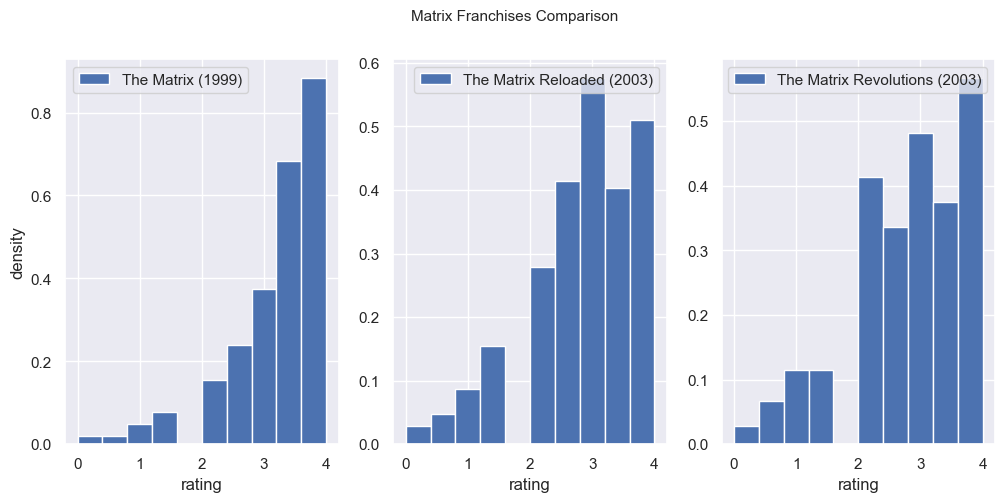

In [162]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle('Matrix Franchises Comparison', fontsize=11)
labels = ['The Matrix (1999)', 'The Matrix Reloaded (2003)', 'The Matrix Revolutions (2003)']
m = [m1, m2, m3]
for i in range(0, 3):
    ax[i].hist(m[i], label = labels[i], density = True)
    ax[i].set_xlabel("rating")
    ax[i].legend()
    if i ==0:
        ax[i].set_ylabel('density')

Indiana Jones and the Raiders of the Lost Ark (1981)
Indiana Jones and the Temple of Doom (1984)
Indiana Jones and the Last Crusade (1989)
Indiana Jones and the Kingdom of the Crystal Skull (2008)

In [105]:
i1 = pd.to_numeric(df['Indiana Jones and the Raiders of the Lost Ark (1981)'],errors='coerce').values
i2 = pd.to_numeric(df['Indiana Jones and the Temple of Doom (1984)'],errors='coerce').values
i3 = pd.to_numeric(df['Indiana Jones and the Last Crusade (1989)'],errors='coerce').values
i4 = pd.to_numeric(df['Indiana Jones and the Kingdom of the Crystal Skull (2008)'],errors='coerce').values

temp = np.array([pd.isnull(i1),pd.isnull(i2),pd.isnull(i3), pd.isnull(i4)],dtype=bool)
temp2 = temp*1
temp2 = sum(temp2)
missingData = np.where(temp2>0)
i1 = np.delete(i1,missingData)
i2 = np.delete(i2,missingData)
i3 = np.delete(i3,missingData)
i4 = np.delete(i4,missingData)

print('shape:',i1.shape)
print('mean:', np.mean(i1), np.mean(i2),np.mean(i3),np.mean(i4))

h,p = stats.kruskal(i1, i2, i3, i4)
h, p

shape: (244,)
mean: 3.055327868852459 2.8299180327868854 2.9241803278688523 2.4528688524590163


(54.19395477406098, 1.020118354785894e-11)

### Jurassic Park

In [179]:
j1 = pd.to_numeric(df['Jurassic Park (1993)'],errors='coerce').values
j2 = pd.to_numeric(df['The Lost World: Jurassic Park (1997)'],errors='coerce').values
j3 = pd.to_numeric(df['Jurassic Park III (2001)'],errors='coerce').values

temp = np.array([pd.isnull(j1),pd.isnull(j2),pd.isnull(j3)],dtype=bool)
temp2 = temp*1
temp2 = sum(temp2)
missingData = np.where(temp2>0)
j1 = np.delete(j1,missingData)
j2 = np.delete(j2,missingData)
j3 = np.delete(j3,missingData)

print('shape:',j3.shape)
print('mean:', np.mean(j1), np.mean(j2),np.mean(j3))

h10_4,p10_4 = stats.kruskal(j1, j2, j3)
h10_4,p10_4

shape: (398,)
mean: 3.1331658291457285 2.957286432160804 2.7123115577889445


(49.42733030275783, 1.8492328391686058e-11)

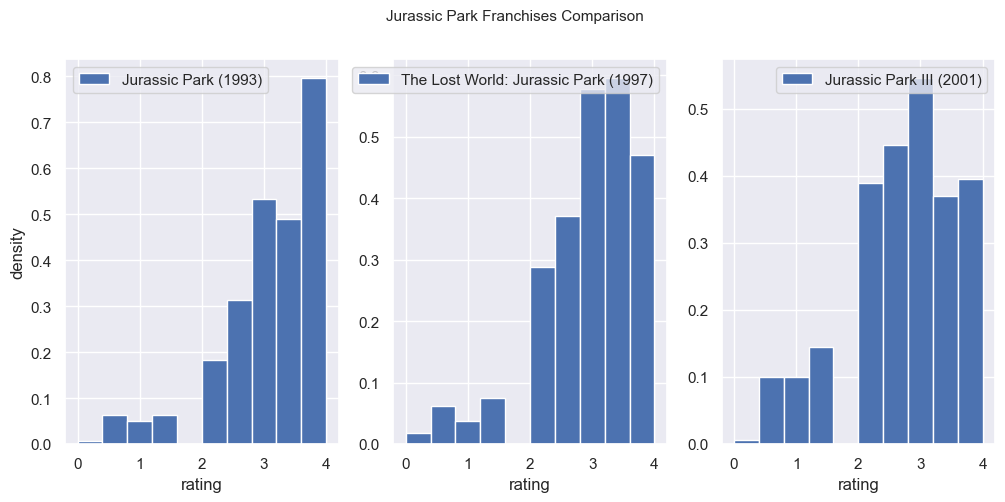

In [180]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle('Jurassic Park Franchises Comparison', fontsize=11)
labels = ['Jurassic Park (1993)', 'The Lost World: Jurassic Park (1997)', 'Jurassic Park III (2001)']
j = [j1, j2, j3]
for i in range(0, 3):
    ax[i].hist(j[i], label = labels[i], density = True)
    ax[i].set_xlabel("rating")
    ax[i].legend()
    if i ==0:
        ax[i].set_ylabel('density')

### Toy Story

In [181]:
t1 = pd.to_numeric(df['Toy Story (1995)'],errors='coerce').values
t2 = pd.to_numeric(df['Toy Story 2 (1999)'],errors='coerce').values
t3 = pd.to_numeric(df['Toy Story 3 (2010)'],errors='coerce').values

temp = np.array([pd.isnull(t1),pd.isnull(t2),pd.isnull(t3)],dtype=bool)
temp2 = temp*1
temp2 = sum(temp2)
missingData = np.where(temp2>0)
t1 = np.delete(t1,missingData)
t2 = np.delete(t2,missingData)
t3 = np.delete(t3,missingData)

print('shape:',t3.shape)
print('mean:', np.mean(t1), np.mean(t2),np.mean(t3))

h10_5,p10_5 = stats.kruskal(t1, t2, t3)
h10_5,p10_5

shape: (757,)
mean: 3.358652575957728 3.1968295904887714 3.3071334214002643


(23.496729938969775, 7.902234665149812e-06)

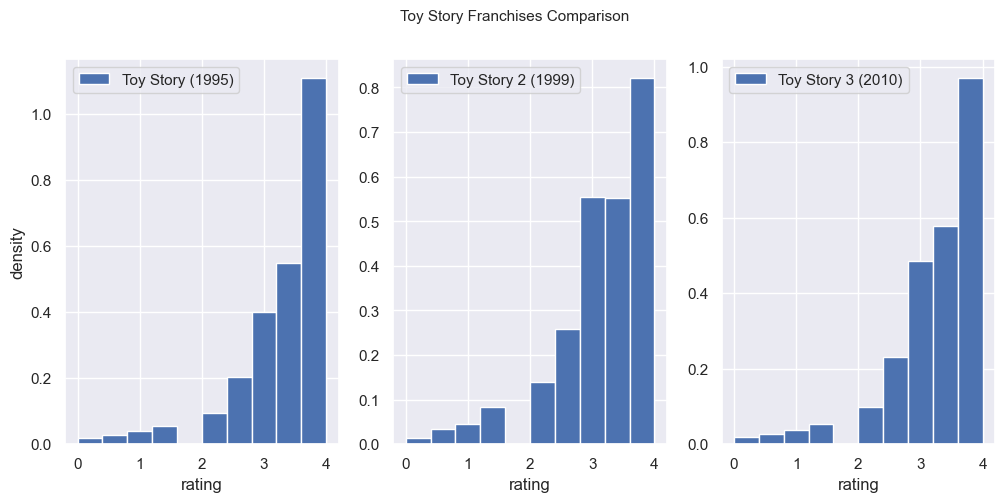

In [182]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle('Toy Story Franchises Comparison', fontsize=11)
labels = ['Toy Story (1995)', 'Toy Story 2 (1999)', 'Toy Story 3 (2010)']
t = [t1, t2, t3]
for i in range(0, 3):
    ax[i].hist(t[i], label = labels[i], density = True)
    ax[i].set_xlabel("rating")
    ax[i].legend()
    if i ==0:
        ax[i].set_ylabel('density')

### Pirates of the Caribbean

In [183]:
p1 = pd.to_numeric(df['Pirates of the Caribbean: The Curse of the Black Pearl (2003)'],errors='coerce').values
p2 = pd.to_numeric(df['Pirates of the Caribbean: Dead Man\'s Chest (2006)'],errors='coerce').values
p3 = pd.to_numeric(df['Pirates of the Caribbean: At World\'s End (2007)'],errors='coerce').values

temp = np.array([pd.isnull(p1),pd.isnull(p2),pd.isnull(p3)],dtype=bool)
temp2 = temp*1
temp2 = sum(temp2)
missingData = np.where(temp2>0)
p1 = np.delete(p1,missingData)
p2 = np.delete(p2,missingData)
p3 = np.delete(p3,missingData)

print('shape:',p1.shape)
print('mean:', np.mean(p1), np.mean(p2),np.mean(p3))

h10_6,p10_6 = stats.kruskal(p1, p2, p3)
h10_6,p10_6

shape: (757,)
mean: 3.035650623885918 2.984848484848485 2.894830659536542


(6.66002108648457, 0.03579272769426581)

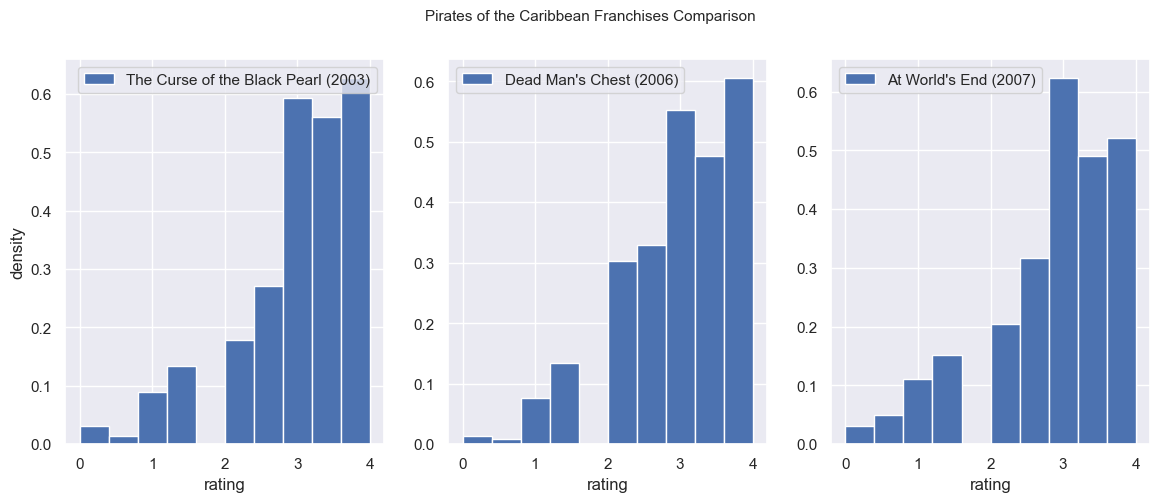

In [186]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))
fig.suptitle('Pirates of the Caribbean Franchises Comparison', fontsize=11)
labels = ['The Curse of the Black Pearl (2003)',\
     'Dead Man\'s Chest (2006)',\
    'At World\'s End (2007)']
p = [p1, p2, p3]
for i in range(0, 3):
    ax[i].hist(p[i], label = labels[i], density = True)
    ax[i].set_xlabel("rating")
    ax[i].legend()
    if i ==0:
        ax[i].set_ylabel('density')

### Batman

In [187]:
b1 = pd.to_numeric(df['Batman (1989)'],errors='coerce').values
b2 = pd.to_numeric(df['Batman & Robin (1997)'],errors='coerce').values
b3 = pd.to_numeric(df['Batman: The Dark Knight (2008)'],errors='coerce').values

temp = np.array([pd.isnull(b1),pd.isnull(b2),pd.isnull(b3)],dtype=bool)
temp2 = temp*1
temp2 = sum(temp2)
missingData = np.where(temp2>0)
b1 = np.delete(b1,missingData)
b2 = np.delete(b2,missingData)
b3 = np.delete(b3,missingData)

print('shape:',b1.shape)
print('mean:', np.mean(b1), np.mean(b2),np.mean(b3))

h10_7,p10_7 = stats.kruskal(b1, b2, b3)
h10_7,p10_7

shape: (219,)
mean: 2.8378995433789953 2.324200913242009 3.228310502283105


(84.65778425637279, 4.1380499020034183e-19)

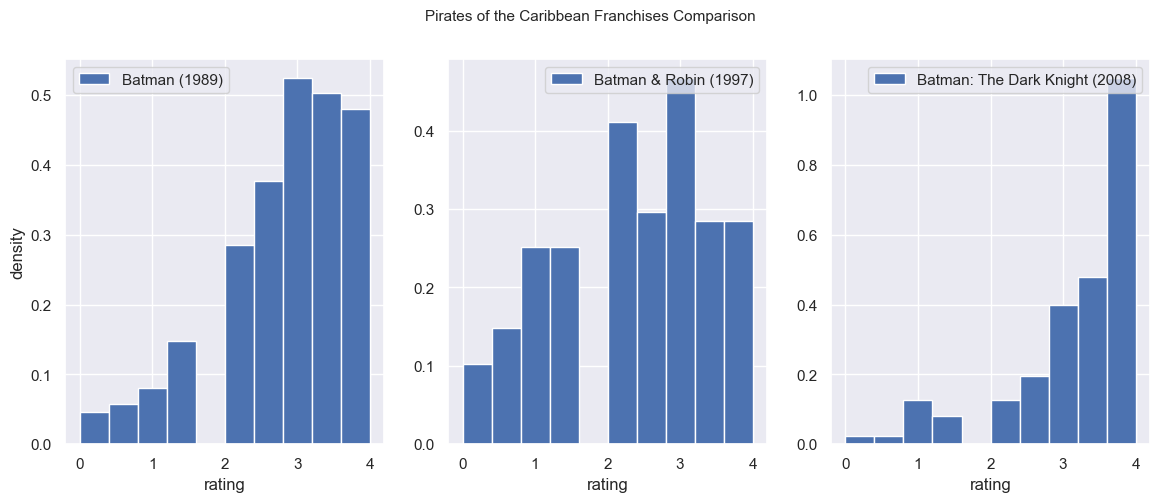

In [188]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))
fig.suptitle('Pirates of the Caribbean Franchises Comparison', fontsize=11)
labels = ['Batman (1989)',\
     'Batman & Robin (1997)',\
    'Batman: The Dark Knight (2008)']
b = [b1, b2, b3]
for i in range(0, 3):
    ax[i].hist(b[i], label = labels[i], density = True)
    ax[i].set_xlabel("rating")
    ax[i].legend()
    if i ==0:
        ax[i].set_ylabel('density')

In [204]:
sum = 0
for i in [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]:
    sum += len(b1[b1 == i])
sum

219

### 11 extra question

In [106]:
energy_level_list = list(df['Is full of energy'])

In [110]:
N_similar_rating_11 = 0
N_dif_rating_11 = 0

for i in range(N_movies):
    current_movie = df[movies[i]]
    e54_cur = [] #record ratings of cur movie whose energy level is 5
    e12_cur= [] #record ratings of cur movie whose energy level is 1
    
    for user_i, rating in current_movie.iteritems():
        if np.isfinite(rating):
            if energy_level_list[user_i] == (5 or 4):
                e54_cur.append(rating)
            elif energy_level_list[user_i] == (1 or 2):
                e12_cur.append(rating)

    u11_cur, p11_cur = stats.mannwhitneyu(e54_cur,e12_cur)

    if p11_cur < 0.005:  
        N_dif_rating_11 += 1
    elif p11_cur >= 0.005:
        N_similar_rating_11 += 1

print(N_dif_rating_11, N_similar_rating_11)
print(N_dif_rating_11/(N_dif_rating_11 + N_similar_rating_11))

11 389
0.0275
